# Comparativo entre Classificação

Por Thierry Pierre e Vinícius Lettiéri.

Para esse trabalho utilizaremos dados de qualidade de vinho do seguinte dataset: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [12]:
data = pd.read_csv("../dados/WineQT.csv")

In [13]:
# Removendo a coluna de Id
data = data.drop("Id", axis=1)

In [14]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
feature_columns = data.columns[:-1]

In [16]:
data['quality'] = data['quality'].map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5})

# Colunas

São propriedades de cada um dos vinhos.

In [17]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


# Análise Inicial dos Dados

Podemos ver que existem **1143 linhas no total** e nenhum dado nulo.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


De forma geral os valores parecem seguir um intervalo aceitável de acordo com seus significados. A maioria parece ter um comportamento normal. Porém, se analisarmos em relação às quantidades recomendadas, vemos que em geral estão bem alteradas. Podemos entender esse comportamento com mais análises específicas.

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


## Dados Duplicados

Existem dados duplicados, podemos removê-los visto que as informações não trazem novidades.

In [26]:
len(data) - len(data.drop_duplicates())

0

In [27]:
data = data.drop_duplicates()

## Distribuições das Features

Podemos comparar a distribuição dos dados separando pelas classes e analisar como se comportam.

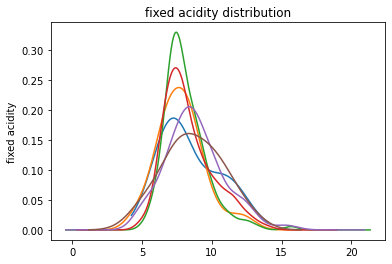

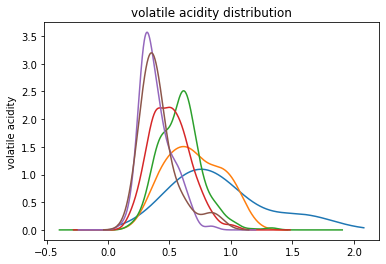

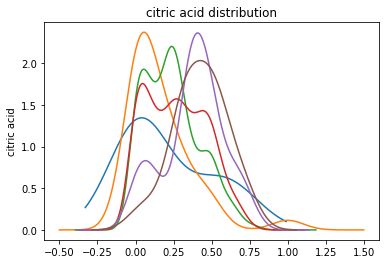

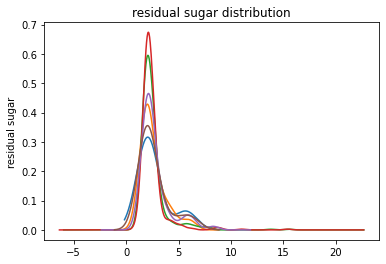

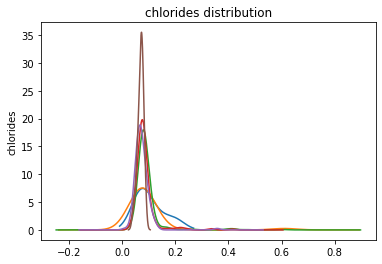

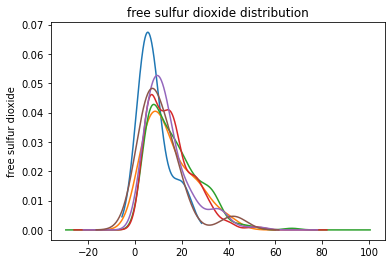

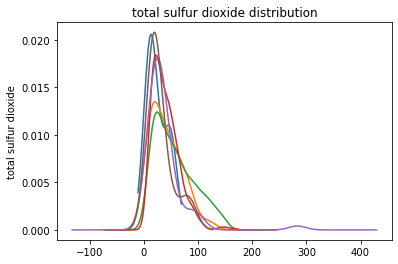

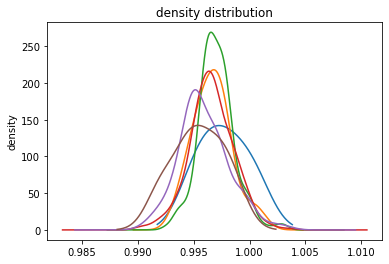

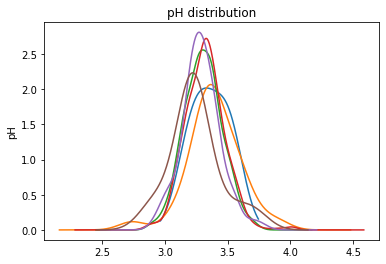

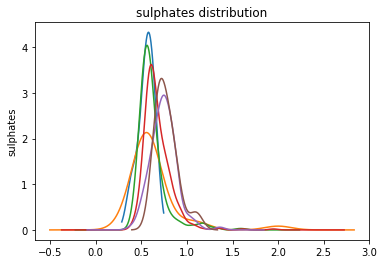

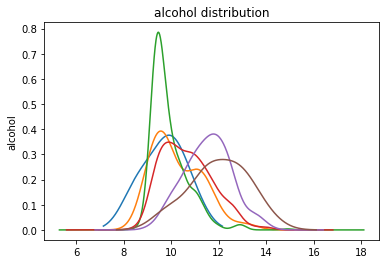

In [28]:
for column in feature_columns:
    for quality in sorted(data.quality.unique()):
        data[data["quality"] == quality][column].plot.kde()
    
    plt.gca().set(title=f"{column} distribution", ylabel=column)
    plt.savefig(f'feature_distribution_{column}.png')
    plt.show()

## Análise de Box Plot

Podemos ver uma grande quantidade de possíveis outliers para tratarmos.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data[feature_columns])
standardized = pd.DataFrame(scaler.transform(data[feature_columns]), columns=feature_columns)

px.box(standardized)

In [30]:
from sklearn import preprocessing

normalized = preprocessing.normalize(data[feature_columns], axis=0)
normalized = pd.DataFrame(normalized, columns=feature_columns)

px.box(normalized)

## Feature Selection

In [31]:
quantidade_piores_features = 2

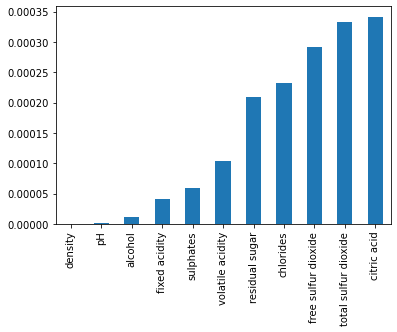

In [32]:
data_variance = normalized.var().sort_values()
data_variance.plot.bar()

In [33]:
feature_columns = data_variance.index[quantidade_piores_features:]
data = data[feature_columns].assign(quality=data['quality'])

In [34]:
data.head()

,alcohol,fixed acidity,sulphates,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,citric acid,quality
0,9.4,7.4,0.56,0.70,1.9,0.076,11.0,34.0,0.00,2
1,9.8,7.8,0.68,0.88,2.6,0.098,25.0,67.0,0.00,2
2,9.8,7.8,0.65,0.76,2.3,0.092,15.0,54.0,0.04,2
3,9.8,11.2,0.58,0.28,1.9,0.075,17.0,60.0,0.56,3
5,9.4,7.4,0.56,0.66,1.8,0.075,13.0,40.0,0.00,2


## Remoção de Outliers

In [35]:
import scikit_posthocs as sp

In [36]:
def drop_outliers(df, feature_columns):
    """ Utilizamos a analise de outliers por distancia interquartil.
        Realiza o drop olhando todas as colunas das feature columns.
    """

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    _filter = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)
    df_trips_filtrado = df[_filter]

    return df_trips_filtrado

In [37]:
def drop_outliers_by_class(df, feature_columns, class_column):
    """ Realiza o drop a partir dos dados agrupados por suas classes, para manter suas distribuições por classe corretas """
    return df.groupby(class_column).apply(drop_outliers, feature_columns).reset_index(drop=True)

In [38]:
data_filtered = drop_outliers_by_class(data, feature_columns, 'quality')

In [39]:
scaler = StandardScaler().fit(data_filtered[feature_columns])
standardized = pd.DataFrame(scaler.transform(data_filtered[feature_columns]), columns=feature_columns)

px.box(standardized)

Class 0 with 1 instance


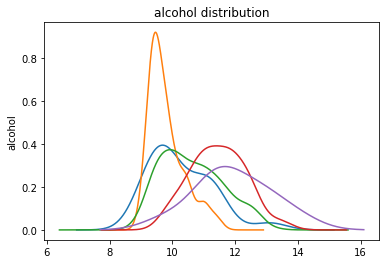

Class 0 with 1 instance


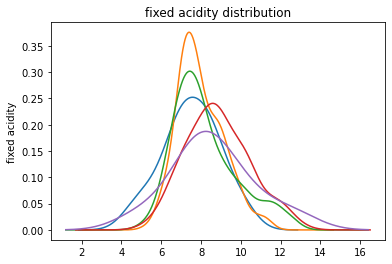

Class 0 with 1 instance


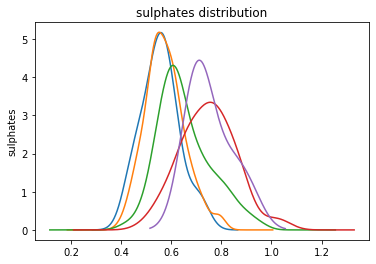

Class 0 with 1 instance


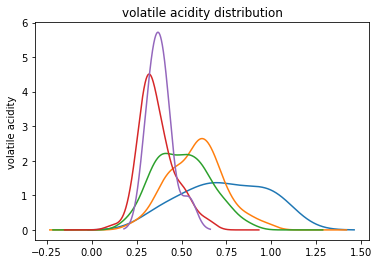

Class 0 with 1 instance


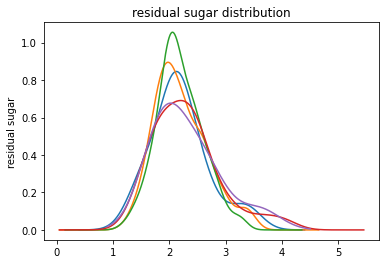

Class 0 with 1 instance


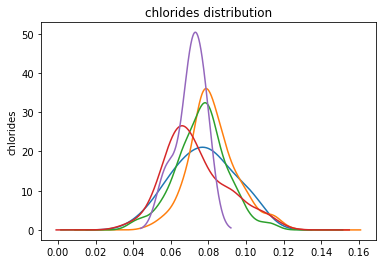

Class 0 with 1 instance


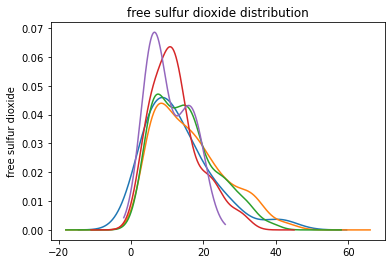

Class 0 with 1 instance


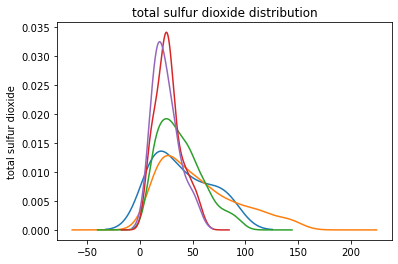

Class 0 with 1 instance


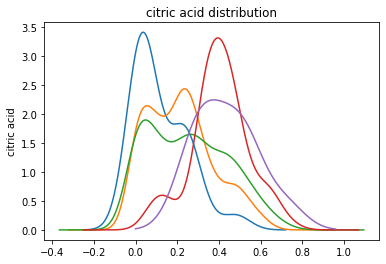

In [27]:
for column in feature_columns:
    for quality in sorted(data_filtered.quality.unique()):
        df = data_filtered[data_filtered["quality"] == quality]
        if len(df) > 1:
            df[column].plot.kde()
        else:
            print(f"Class {quality} with 1 instance")
    
    plt.gca().set(title=f"{column} distribution", ylabel=column)
    plt.show()

# Separação e Teste

In [28]:
data = data_filtered

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(["quality"], axis=1), data["quality"], test_size=1/3, random_state=42)

# Teste de Classificação

In [31]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report

## Regressão Logística

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [33]:
def train_logistic_regression(X_train, Y_train, X_test, Y_test, max_iter=1000):
    scaler = MinMaxScaler()
    model = LogisticRegression(random_state=42, multi_class="multinomial", max_iter=max_iter)
    logistic_regression_pipeline = Pipeline(
        steps=[("scaler", scaler), ("logistic", model)]
    )

    logistic_regression_pipeline.fit(X_train, Y_train)
    Y_pred = model.predict(X_test.values)

    print(classification_report(Y_test, Y_pred, zero_division=1))

In [34]:
train_logistic_regression(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           1       1.00      0.00      0.00         6
           2       0.77      0.48      0.59       119
           3       0.49      0.83      0.62       102
           4       0.57      0.17      0.27        23
           5       1.00      0.00      0.00         4

    accuracy                           0.57       254
   macro avg       0.77      0.30      0.30       254
weighted avg       0.65      0.57      0.55       254



## Support Vector Machine - SVC

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [36]:
def train_svc(X_train, Y_train, X_test, Y_test, max_iter=1000):
    scaler = MinMaxScaler()
    model = SVC(random_state=42, gamma='auto')
    svc_pipeline = Pipeline(
        steps=[("scaler", scaler), ("svc", model)]
    )

    svc_pipeline.fit(X_train, Y_train)
    Y_pred = model.predict(X_test.values)

    print(classification_report(Y_test, Y_pred, zero_division=1))

In [37]:
train_svc(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           1       1.00      0.00      0.00         6
           2       1.00      0.00      0.00       119
           3       0.40      1.00      0.57       102
           4       1.00      0.00      0.00        23
           5       1.00      0.00      0.00         4

    accuracy                           0.40       254
   macro avg       0.88      0.20      0.11       254
weighted avg       0.76      0.40      0.23       254



## Naive Bayes Classifier

Comentar sobre isso https://stats.stackexchange.com/questions/254723/standardisation-in-naive-bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [39]:
def train_naive_bayes(X_train, Y_train, X_test, Y_test, max_iter=1000):
    model = MultinomialNB()
    naivebayes_pipeline = Pipeline(
        steps=[("naive bayes", model)]
    )

    naivebayes_pipeline.fit(X_train.values, Y_train.values)
    Y_pred = model.predict(X_test.values)

    print(classification_report(Y_test, Y_pred, zero_division=1))

In [40]:
train_naive_bayes(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           1       1.00      0.00      0.00         6
           2       0.72      0.53      0.61       119
           3       0.52      0.52      0.52       102
           4       0.20      0.57      0.30        23
           5       1.00      0.00      0.00         4

    accuracy                           0.51       254
   macro avg       0.69      0.32      0.29       254
weighted avg       0.60      0.51      0.52       254



## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [42]:
def train_random_forecast(X_train, Y_train, X_test, Y_test, max_iter=1000):
    scaler = MinMaxScaler()
    model = RandomForestClassifier(random_state=42)
    random_forest_pipeline = Pipeline(
        steps=[("scaler", scaler), ("random forest", model)]
    )

    random_forest_pipeline.fit(X_train, Y_train)
    Y_pred = model.predict(X_test.values)

    print(classification_report(Y_test, Y_pred, zero_division=1))

In [43]:
train_random_forecast(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           1       1.00      0.00      0.00         6
           2       0.00      0.00      0.00       119
           3       0.40      0.99      0.57       102
           4       1.00      0.00      0.00        23
           5       1.00      0.00      0.00         4

    accuracy                           0.40       254
   macro avg       0.68      0.20      0.11       254
weighted avg       0.29      0.40      0.23       254



# Analisando os Resultados

No geral todos os modelos falharam ao tentar classificar bem a qualidade dos vinhos. A dúvida é se foi um erro nosso, ou se realmente a base de dados não é suficiente para fazermos uma boa classificação. Então, procuramos por outros trabalhos que tentaram classificar a mesma base.

Usando como referência esse trabalho https://www.kaggle.com/code/georgyzubkov/wine-quality-exploratory-data-analysis-ml/notebook, notamos um detalhe interessante. As métricas obtidas por ele estavam muito boas, muito diferente das nossas. O estranho é ele ter feito apenas um balanceamento de dados como pré-processamento. Isso bastou para que ele conseguisse bons números. Vamos aqui reproduzir o que ele fez:

In [414]:
train = pd.read_csv("../dados/WineQT.csv")

In [415]:
from imblearn.over_sampling import SMOTE 

In [416]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(train.drop(["quality"],axis=1),train["quality"])

In [417]:
scaler = preprocessing.MinMaxScaler()
names = features.columns
d = scaler.fit_transform(features)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.000000
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,0.000626
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,0.001252
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,0.001879
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.002505


In [418]:
X_train, X_test, y_train, y_test=train_test_split(scaled_df,labels,test_size=0.33,random_state=42)

In [419]:
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

           3       0.99      1.00      0.99       156
           4       0.93      0.96      0.94       157
           5       0.77      0.73      0.75       168
           6       0.68      0.55      0.61       166
           7       0.78      0.91      0.84       159
           8       0.96      1.00      0.98       151

    accuracy                           0.85       957
   macro avg       0.85      0.86      0.85       957
weighted avg       0.85      0.85      0.85       957

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           3       0.92      1.00      0.96       156
           4       0.76      0.97      0.85       157
           5       0.63      0.50      0.56       168
           6       0.56      0.34      0.43       166
           7       0.72      0.79      0.75       159
           8       0.84      0.99    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



model: XGBClassifier(objective='multi:softprob')
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       156
           4       0.80      0.94      0.87       157
           5       0.72      0.58      0.64       168
           6       0.65      0.48      0.55       166
           7       0.74      0.90      0.81       159
           8       0.90      0.99      0.94       151

    accuracy                           0.81       957
   macro avg       0.80      0.81      0.80       957
weighted avg       0.80      0.81      0.80       957

------------------------------ 



Parece muito simples apenas balancear os dados e obter boas métricas. É como se base de dados estivesse boa, diferente daquilo que presenciamos. O problema é que ele balanceou os dados antes de dividir em treinamento e teste. Façamos o inverso, dividir em treinamento e teste, e balancear apenas o dataset de treinamento para ver o que acontece.

In [421]:
train = pd.read_csv('../dados/WineQT.csv')

In [422]:
scaler = preprocessing.MinMaxScaler()
names = train.drop(["quality"], axis=1).columns
d = scaler.fit_transform(train.drop(["quality"], axis=1))

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.000000
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,0.000626
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,0.001252
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,0.001879
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.002505


In [423]:
X_train, X_test, y_train, y_test=train_test_split(scaled_df,train["quality"],test_size=0.33,random_state=42)

In [426]:
oversample = SMOTE(k_neighbors=4)
X_train, y_train =  oversample.fit_resample(X_train,y_train)

In [427]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.09      0.11      0.10         9
           5       0.70      0.71      0.70       158
           6       0.64      0.58      0.61       158
           7       0.53      0.62      0.57        47
           8       0.17      0.20      0.18         5

    accuracy                           0.62       378
   macro avg       0.35      0.37      0.36       378
weighted avg       0.63      0.62      0.62       378

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.04      0.22      0.07         9
           5       0.59      0.49      0.53       158
           6       0.52      0.33      0.40       158
           7       0.37      0.49      0.42        47
           8       0.08      0.40    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



model: LogisticRegression()
              precision    recall  f1-score   support

           3       0.03      1.00      0.06         1
           4       0.04      0.33      0.07         9
           5       0.64      0.46      0.53       158
           6       0.59      0.25      0.35       158
           7       0.29      0.38      0.33        47
           8       0.09      0.60      0.16         5

    accuracy                           0.36       378
   macro avg       0.28      0.50      0.25       378
weighted avg       0.55      0.36      0.42       378

------------------------------ 

model: XGBClassifier(objective='multi:softprob')
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.04      0.11      0.06         9
           5       0.70      0.62      0.66       158
           6       0.63      0.51      0.56       158
           7       0.45      0.64      0.53        47
           8       0.0

Ao inverter a ordem, balanceando apenas os dados de treinamento, o resultado foi bem pior, parecido com o nosso. Isso ocorre pois, ao balancear o dataset inteiro antes de dividi-lo, você está enviesando os dados de teste com réplicas. Por isso, as métricas ficam mais acima.